# **13-month smoothed monthly total sunspot number** [1/1749 - now] 
Dataet er fra https://www.sidc.be/SILSO/datafiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

data = np.genfromtxt("13 months smooth.csv", delimiter=';')
år = data[:,0]
måned = data[:,1]
dato_fraction = data[:,2]
SN = data[:,3]
std = data[:,4]
N = data[:,5]
definite = data[:,6]

## Alt data plottet

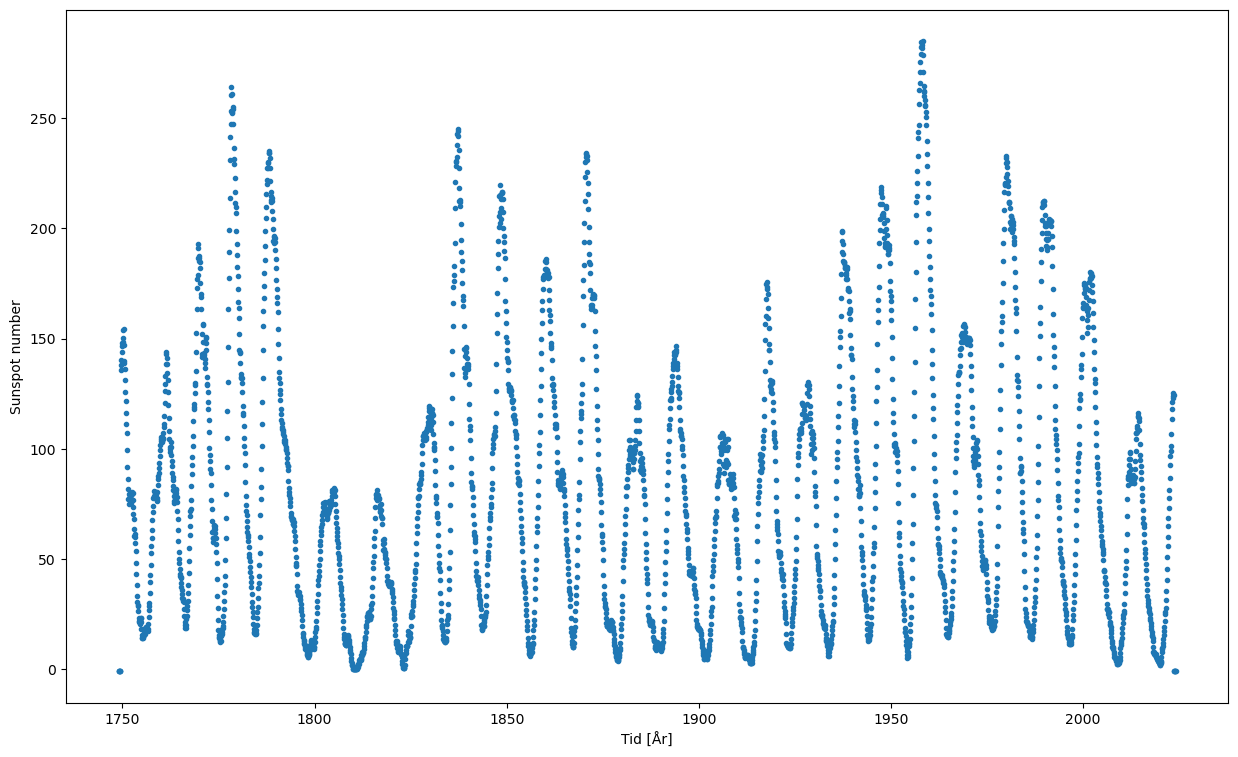

In [2]:
plt.figure(figsize=[15,9])
plt.plot(dato_fraction,SN, '.')
plt.xlabel("Tid [År]")
plt.ylabel("Sunspot number")
plt.show()

## Data hvor $(SN \lor  N)=-1$ er trukket fra
Åbenbart kan man have -1 sunspot number og -1 personer der observerer det... Er forvirret over -1 personer lol.

In [3]:
SN2 = []
dato_fraction2 = []
usikkerhed2 = []

for i in range(len(dato_fraction)):
    if N[i] > 0 and SN[i] >= 0:
        SN2.append(SN[i])
        dato_fraction2.append(dato_fraction[i])
        usikkerhed2.append(abs(std[i]/np.sqrt(N[i])))

SN2 = np.array(SN2)
dato_fraction2 = np.array(dato_fraction2)
usikkerhed2 = np.array(usikkerhed2)

#Dage taget fra
print(f'Antallet af datapunkter der er taget fra: {len(dato_fraction)-len(dato_fraction2)}')
print(dato_fraction2[-1])

Antallet af datapunkter der er taget fra: 835
2023.538


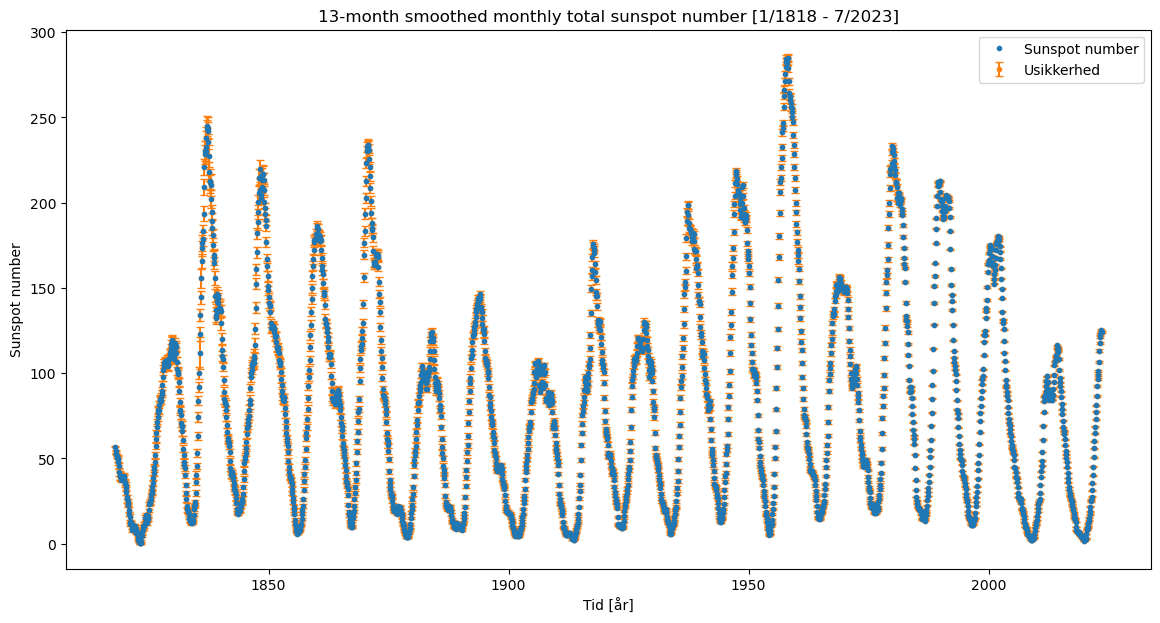

In [4]:
plt.figure(figsize=[14,7])
plt.plot(dato_fraction2, SN2, '.', label="Sunspot number", zorder=1)
plt.errorbar(dato_fraction2, SN2, fmt='.',yerr=usikkerhed2, label="Usikkerhed", capsize=3, zorder=0)
plt.title("13-month smoothed monthly total sunspot number [1/1818 - 7/2023]")
plt.ylabel("Sunspot number")
plt.xlabel("Tid [år]")
plt.legend()
plt.show()

## Curve fit

[ 4.78173830e+01  5.77269048e-01  1.13117896e+02  6.18858616e+01
 -1.53293886e+01  5.60783596e-02  1.32070763e+01]
[1.23296278e-02 6.72641278e-06 1.35031997e-02 1.92728389e-02
 1.12872476e-02 2.51003826e-05 4.93260392e-02]
3570.503109831504


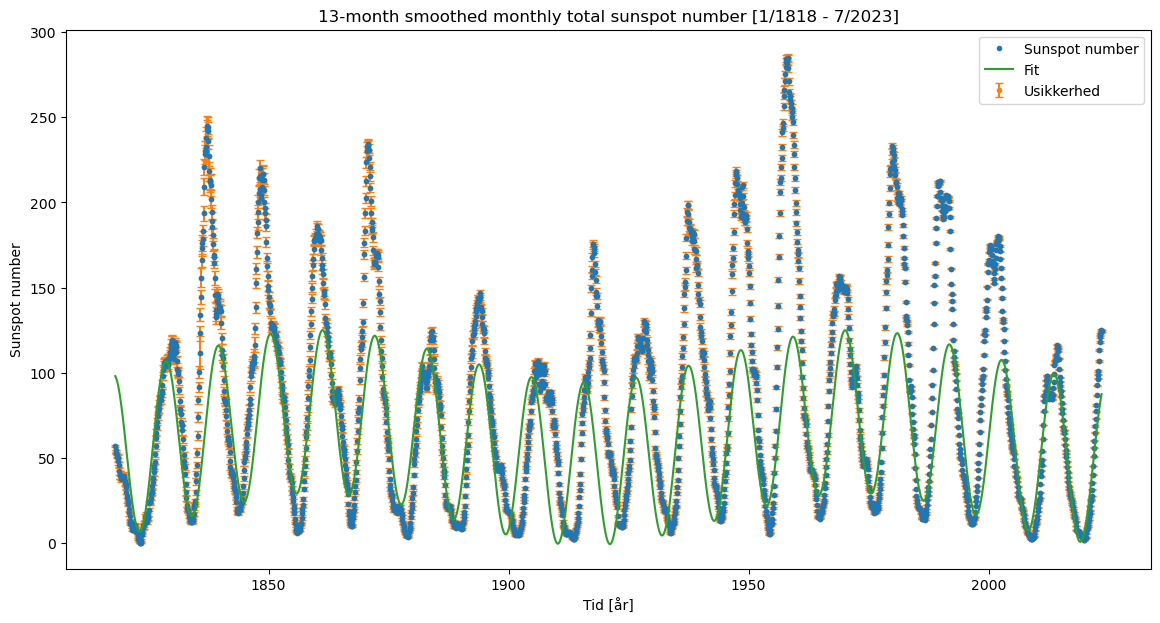

In [5]:
from scipy.optimize import curve_fit

def func1(t,A,w,p,k, A2, w2, p2):
    return A*np.cos(w*t-p) +k + A2* np.cos(w2*t-p2)

par, cov = curve_fit(func1, dato_fraction2, SN2,p0=[7000, 0.6, 158, 100, 7000, 0.05, np.pi/2], sigma=usikkerhed2, absolute_sigma=True)
print(par)
print(np.sqrt(np.diag(cov)))
xx = np.linspace(np.min(dato_fraction2), np.max(dato_fraction2),10000)
yy = func1(xx,*par)

chi = np.sum((SN2-func1(dato_fraction2,*par))**2 / usikkerhed2**2)
chi_red = chi/(len(dato_fraction2)-len(par))
print(chi_red)

plt.figure(figsize=[14,7])
plt.plot(dato_fraction2, SN2, '.', label="Sunspot number", zorder=1)
plt.errorbar(dato_fraction2, SN2, fmt='.',yerr=usikkerhed2, label="Usikkerhed", capsize=3, zorder=0)
plt.plot(xx, yy, label="Fit")
plt.title("13-month smoothed monthly total sunspot number [1/1818 - 7/2023]")
plt.ylabel("Sunspot number")
plt.xlabel("Tid [år]")
plt.legend()
plt.show()

## Andet plot ting

In [6]:
yy2 = SN2 - func1(dato_fraction2, *par)

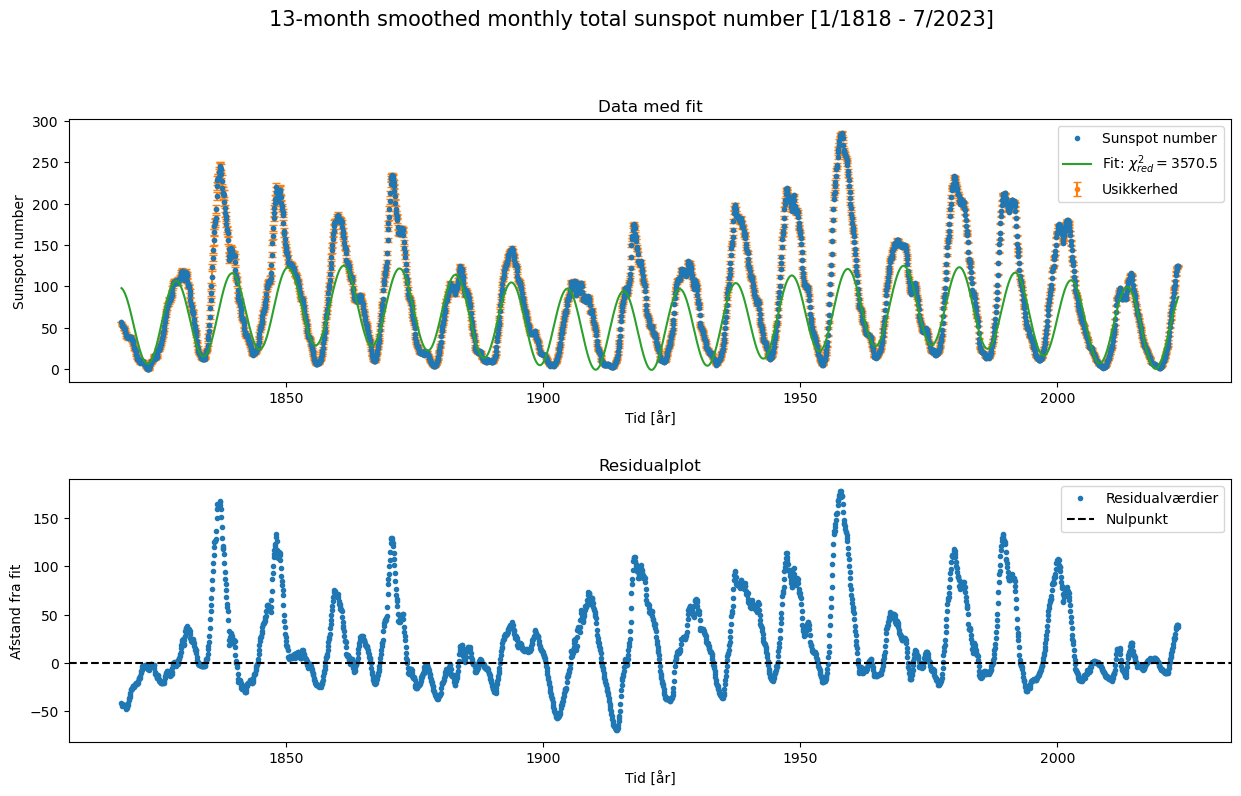

In [7]:
plt.figure(figsize=[15,11])
plt.suptitle('13-month smoothed monthly total sunspot number [1/1818 - 7/2023]', size=15)
plot1 = plt.subplot2grid((19, 13), (0, 0), rowspan=6, colspan=13) 
plot2 = plt.subplot2grid((19, 13), (8, 0), rowspan=6, colspan=13)

plot1.plot(dato_fraction2, SN2, '.', label="Sunspot number", zorder=1)
plot1.errorbar(dato_fraction2, SN2, fmt='.',yerr=usikkerhed2, label="Usikkerhed", capsize=3, zorder=0)
plot1.plot(xx, yy, label="Fit: $\chi^2_{red}=$" + str(round(chi_red,2)))
plot1.set_title("Data med fit")
plot1.set_ylabel("Sunspot number")
plot1.set_xlabel("Tid [år]")
plot1.legend()

plot2.plot(dato_fraction2, yy2, '.', label="Residualværdier")
plot2.set_title("Residualplot")
plot2.set_ylabel("Afstand fra fit")
plot2.set_xlabel("Tid [år]")
plot2.axhline(y=0, linestyle="dashed", label="Nulpunkt", color="black")
plot2.legend()
plt.show()

## Usikkerhed plottet i forhold til tid

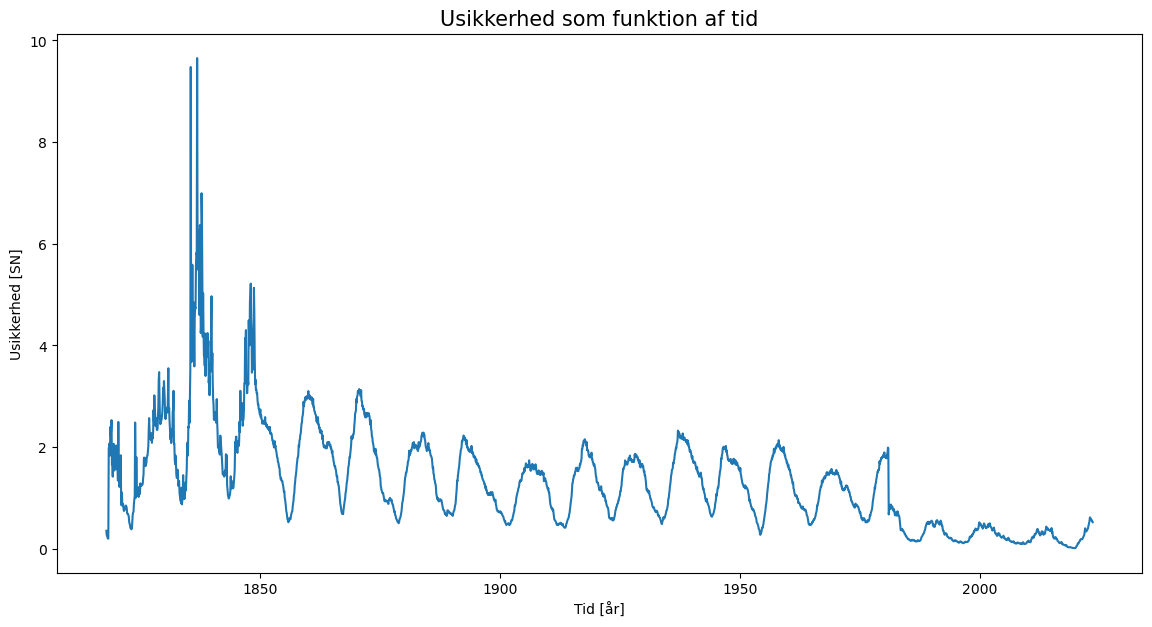

In [8]:
plt.figure(figsize=[14,7])
plt.plot(dato_fraction2, usikkerhed2)
plt.title("Usikkerhed som funktion af tid", size=15)
plt.ylabel("Usikkerhed [SN]")
plt.xlabel("Tid [år]")
plt.show()

## Hvor hver cyklus begynder

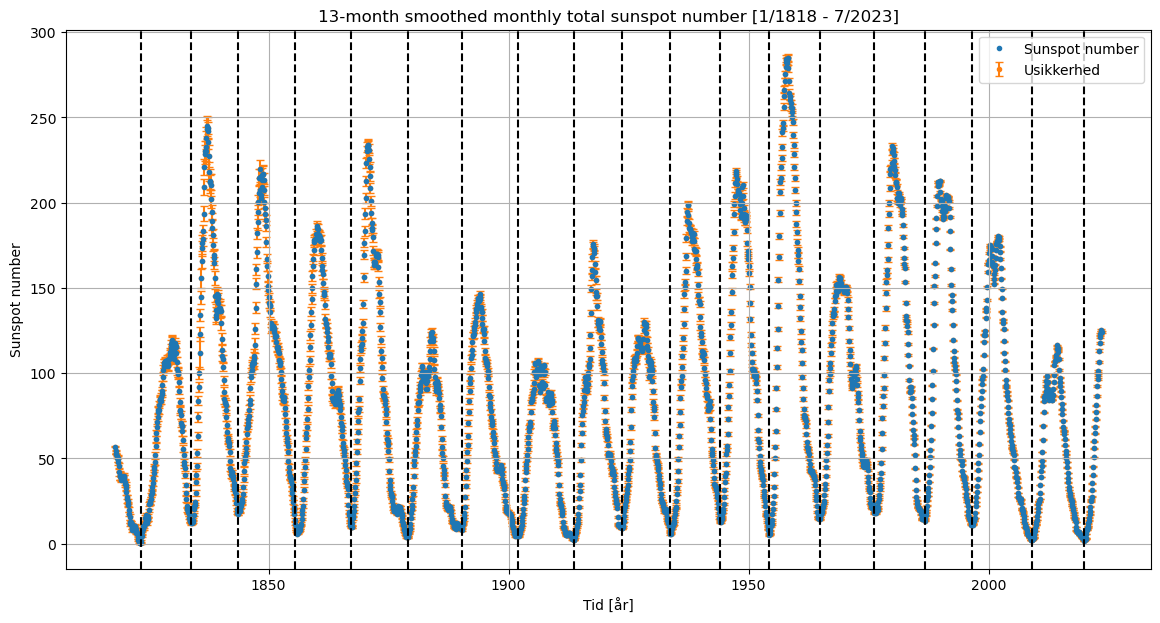

In [44]:
cycle_begin = [1823.371, 1833.874, 1843.538, 1855.538, 1867.204, 1878.958, 1890.204, 1902.042, 1913.538, 1923.623, 1933.707, 
               1944.124, 1954.288, 1964.791,1976.206, 1986.707, 1996.624, 2008.958, 2019.958]

plt.figure(figsize=[14,7])
plt.plot(dato_fraction2, SN2, '.', label="Sunspot number", zorder=1)
for i in cycle_begin:
    plt.axvline(i, linestyle='dashed', color='black')
plt.errorbar(dato_fraction2, SN2, fmt='.',yerr=usikkerhed2, label="Usikkerhed", capsize=3, zorder=0)
plt.title("13-month smoothed monthly total sunspot number [1/1818 - 7/2023]")
plt.ylabel("Sunspot number")
plt.xlabel("Tid [år]")
plt.legend()
plt.grid()
plt.show()

## De tre sidste cykler

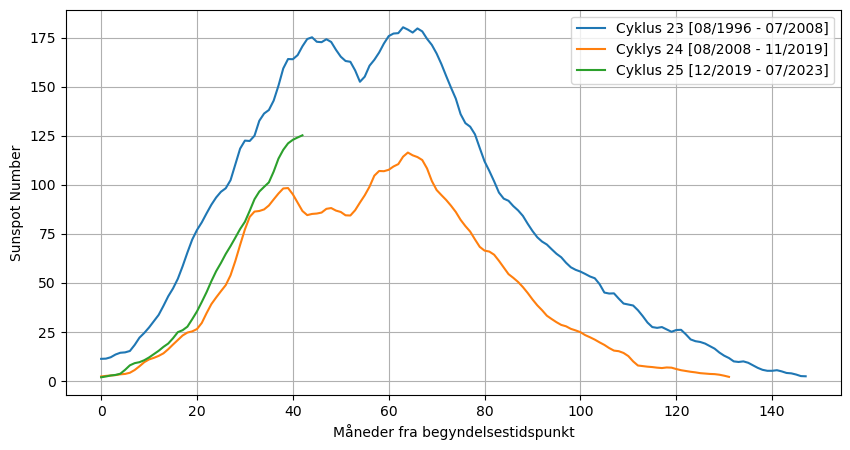

In [41]:
a = np.where(dato_fraction2 == cycle_begin[-3])[0][0]
b = np.where(dato_fraction2 == cycle_begin[-2])[0][0]
c = np.where(dato_fraction2 == cycle_begin[-1])[0][0]

cycle_23 = []
cycle_23_months = []
k = a
for i in range(b-a):
    cycle_23.append(SN2[k])
    cycle_23_months.append(i)
    k += 1

cycle_24 = []
cycle_24_months = []
k = b
for i in range(c-b):
    cycle_24.append(SN2[k])
    cycle_24_months.append(i)
    k += 1

cycle_25 = []
cycle_25_months = []
k = c
for i in range(len(SN2)-1-c):
    cycle_25.append(SN2[k])
    cycle_25_months.append(i)
    k += 1

plt.figure(figsize=[10,5])
plt.plot(cycle_23_months,cycle_23, label='Cyklus 23 [08/1996 - 07/2008]')
plt.plot(cycle_24_months, cycle_24, label='Cyklys 24 [08/2008 - 11/2019]')
plt.plot(cycle_25_months, cycle_25, label='Cyklus 25 [12/2019 - 07/2023]')
plt.legend()
plt.ylabel("Sunspot Number")
plt.xlabel("Måneder fra begyndelsestidspunkt")
plt.grid()